In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-08-15-18_48_55/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

71111 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

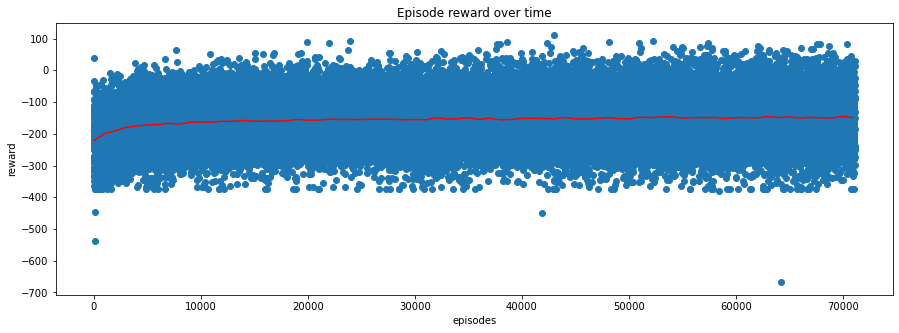

Maximum: 110.0
Average: -156.95068554793426
Moving Average (simple): {0: -221.82517482517483, 1000: -199.583016983017, 2000: -190.8003996003996, 3000: -179.8989010989011, 4000: -175.6843156843157, 5000: -172.38201798201797, 6000: -171.2947052947053, 7000: -166.57202797202797, 8000: -169.5182817182817, 9000: -163.99440559440558, 10000: -162.65034965034965, 11000: -163.33506493506493, 12000: -160.602997002997, 13000: -160.83796203796203, 14000: -158.14365634365635, 15000: -160.57162837162838, 16000: -160.16263736263735, 17000: -159.9992007992008, 18000: -159.36003996003996, 19000: -154.6931068931069, 20000: -157.35964035964037, 21000: -156.95144855144855, 22000: -154.43296703296704, 23000: -154.84855144855143, 24000: -155.15304695304695, 25000: -155.22037962037962, 26000: -154.20759240759241, 27000: -154.17142857142858, 28000: -154.584015984016, 29000: -155.81358641358642, 30000: -155.05034965034966, 31000: -156.0857142857143, 32000: -149.83136863136863, 33000: -153.8141858141858, 34000:

In [5]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

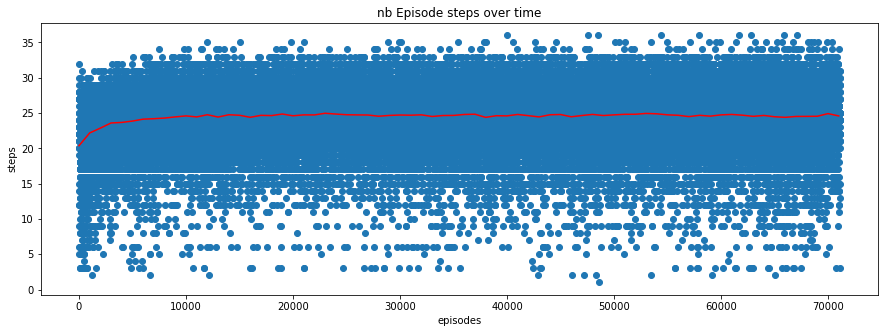

Maximum: 36
Average: 24.483905443602257
Moving Average (simple): {0: 20.37062937062937, 1000: 22.176823176823177, 2000: 22.864135864135864, 3000: 23.59040959040959, 4000: 23.668331668331668, 5000: 23.861138861138862, 6000: 24.12987012987013, 7000: 24.193806193806193, 8000: 24.28771228771229, 9000: 24.45054945054945, 10000: 24.59140859140859, 11000: 24.446553446553448, 12000: 24.756243756243755, 13000: 24.426573426573427, 14000: 24.755244755244757, 15000: 24.67932067932068, 16000: 24.393606393606394, 17000: 24.66933066933067, 18000: 24.634365634365633, 19000: 24.85814185814186, 20000: 24.604395604395606, 21000: 24.737262737262736, 22000: 24.72927072927073, 23000: 24.964035964035965, 24000: 24.853146853146853, 25000: 24.756243756243755, 26000: 24.732267732267733, 27000: 24.717282717282718, 28000: 24.544455544455545, 29000: 24.657342657342657, 30000: 24.716283716283716, 31000: 24.68831168831169, 32000: 24.742257742257742, 33000: 24.509490509490508, 34000: 24.643356643356643, 35000: 24.659

In [6]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

In [7]:
#plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")